<a href="https://colab.research.google.com/github/Elma-dev/Diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
diab_data=pd.read_csv('diabetes_prediction_dataset.csv')
diab_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
diab_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#<center>**Diabetes Prediction Analyse**</center>

##**Gender**

In [5]:
gender_count=diab_data.groupby('gender').agg('count').diabetes.to_frame().reset_index()
px.pie(data_frame=gender_count,names='gender',values='diabetes',title='gender count')

In [23]:
gender_diabetes_count=diab_data.groupby(['gender','diabetes']).count().age.to_frame().reset_index()
px.bar(data_frame=gender_diabetes_count,x='gender',y='age',color='diabetes',title='gender_vs_diabetes',labels={'age':'count'},text_auto='.2s')

#Smoking Status

In [7]:
diab_smokers=diab_data.groupby(['smoking_history','diabetes']).count().age.reset_index()
px.bar(data_frame=diab_smokers,x='smoking_history',y='age',color='diabetes',title="smoking status vs diabetes",labels={'age':'count'},text_auto='.2s')

In [21]:
#hypertensionVsSmoking
smokVsHyper=diab_data.groupby('smoking_history').sum().hypertension.to_frame().reset_index()
px.bar(data_frame=smokVsHyper,y='smoking_history',x='hypertension',orientation='h',text_auto='.2s')

<ipython-input-21-6b2e70b2aa1c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [22]:
#heart_diseaseVsSmok
smokVsHyper=diab_data.groupby('smoking_history').sum().heart_disease.to_frame().reset_index()
px.bar(data_frame=smokVsHyper,y='smoking_history',x='heart_disease',orientation='h',text_auto='.2s')

<ipython-input-22-5e9f1beeef72>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#HyperTension

<Axes: xlabel='hypertension'>

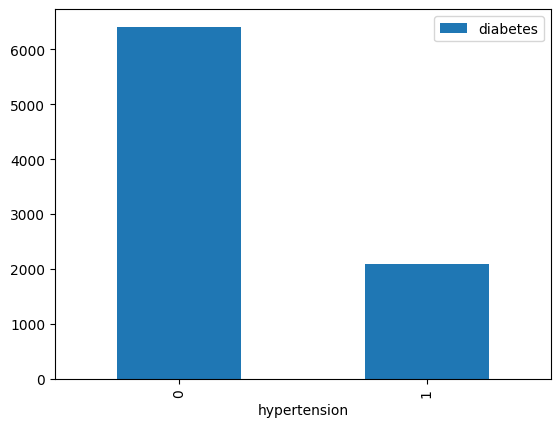

In [8]:
diabetes_hypertension=diab_data.groupby(['hypertension']).diabetes.sum().to_frame()
diabetes_hypertension.plot(kind='bar')

In [9]:
diabetes_hypertension_gender=diab_data.groupby(['gender','hypertension']).diabetes.sum().to_frame().reset_index()
px.bar(data_frame=diabetes_hypertension_gender,x='hypertension',y='diabetes',color='gender',barmode='group')

In [27]:
#hyperVsHeartDiseas
diab_data.groupby('hypertension').heart_disease.sum().to_frame()

,heart_disease
hypertension,
0,3026
1,916


#HeartDisease

In [10]:
heart_disease_count=diab_data.groupby(['heart_disease']).count().diabetes.to_frame().reset_index()
px.pie(data_frame=heart_disease_count,names='heart_disease',values='diabetes',title='hearte_disease count')

In [11]:
disease_diabetes=diab_data.groupby(['heart_disease','diabetes']).count().age.to_frame().reset_index()
disease_diabetes

,heart_disease,diabetes,age
0,0,0,88825
1,0,1,7233
2,1,0,2675
3,1,1,1267


In [28]:
px.bar(data_frame=disease_diabetes,x='heart_disease',y='age',color='diabetes',barmode="group",labels={'age':'count'},text_auto='.2s')

#Age

In [47]:
age_hyperTen=diab_data.groupby('age')['hypertension','diabetes','heart_disease'].sum()
age_hyperTen
px.line(data_frame=age_hyperTen,title="age Vs disease",labels={"value":"sum"})

<ipython-input-47-991bb6bfafc2>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#Bmi: body mass index

In [50]:
#Bmi Vs Diabetes
diab_data.bmi.to_frame().describe()

,bmi
count,100000.000000
mean,27.320767
std,6.636783
min,10.010000
25%,23.630000
50%,27.320000
75%,29.580000
max,95.690000


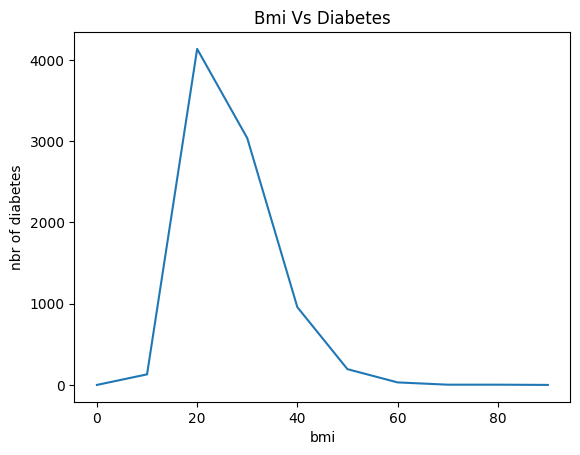

In [116]:
bmi_disease=diab_data.groupby('bmi')['diabetes'].sum().to_frame().reset_index()
y=[]
x=[]
for i in range(0,100,10):
  y.append(bmi_disease[(bmi_disease.bmi>i) & (bmi_disease.bmi<i+10)].diabetes.sum())
  x.append(i)
  
plt.plot(x,y)
plt.xlabel("bmi")
plt.ylabel("nbr of diabetes")
plt.title("Bmi Vs Diabetes")
plt.show()


# HbA1c_level : 
measure of a person's average blood sugar level over the past 2-3 months

In [126]:
hba1c_diab=diab_data.groupby('HbA1c_level').diabetes.sum().to_frame().reset_index()
px.line(data_frame=hba1c_diab,x='HbA1c_level',y='diabetes',markers=True)

In [130]:
hba1c_disease=diab_data.groupby('HbA1c_level')['hypertension','diabetes','heart_disease'].sum()
px.line(data_frame=hba1c_disease,markers=True)

<ipython-input-130-21952e0d1b55>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#blood_glucose_level
Blood glucose level refers to the amount of glucose in the bloodstream at a given time

In [133]:
diab_data.blood_glucose_level.describe().to_frame()

,blood_glucose_level
count,100000.000000
mean,138.058060
std,40.708136
min,80.000000
25%,100.000000
50%,140.000000
75%,159.000000
max,300.000000


In [139]:
blood_gluc=diab_data.groupby('blood_glucose_level').sum().diabetes.to_frame()
px.line(data_frame=blood_gluc,markers=True)

<ipython-input-139-497e30b80d7b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

